[View in Colaboratory](https://colab.research.google.com/github/gitgash/ds-test/blob/master/ann_estimator.ipynb)

# Introduction
This work have been proceed as test job for data scientist position.  
Requrements:  
get [data](https://www.dropbox.com/s/tzb7mjxipz8fnyt/dataset.csv?dl=1) and make estimator with highest f1 metric.  
Dirung this work it have been done: 
1. data exploration,
1. 'traditional' model creation 
1. artificial neural network model creation.

Results considered in conclusion section.  
Google (tm) [Colab.research](https://colab.research.google.com) have been used in this work, but methodology and technology (jupyter notebook) tools can be used in any suitable environment (python, scikit learn, pandas, numpy, tesorflow, keras).  
Style of the work is reproducable - anybody can run this notebook and reproduce results.  
So lets start.

# Data Exploration
In process of data exploration following steps have been proceed:
1. Loading data
1. Simple exploration
1. Correlation analisys


## Load data
Data file have been place to dropbox so we load them from there by url.

In [1]:
# It is preleminary section where we include part of libraries used later 
# and define utility functions
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


# Plot confision matrix function
# (c) by scikit lear documentation and examples
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Using TensorFlow backend.


We use side library to upsample imbalanced test set (later explaned) - so we need to install it:

In [23]:
!pip install -U imbalanced-learn

    100% |████████████████████████████████| 153kB 4.6MB/s 


In [0]:
# load dataset into pandas dataframe

df = pd.read_csv("https://www.dropbox.com/s/tzb7mjxipz8fnyt/dataset.csv?dl=1")


## Simple data exploration

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28125 entries, 0 to 28124
Columns: 1367 entries, id to label
dtypes: float64(1365), int64(1), object(1)
memory usage: 293.3+ MB


,id,f1_avg__r0,f1_stddev__r0,f1_min__r0,f1_max__r0,f2_avg__r0,f2_stddev__r0,f2_min__r0,f2_max__r0,f3_avg__r0,...,f21_q1__r4,f21_q2__r4,f21_q3__r4,f21_q4__r4,f21_q5__r4,f21_q6__r4,f21_q7__r4,f21_q8__r4,f21_q9__r4,label
0,0134cd2e-967e-3f2f-5caa-3c450b0d8e1f,46731.346682,12910.739495,3275.0,110294.0,23.220351,13.563847,1.0,97.0,336.262593,...,28.0,28.0,29.0,29.0,30.0,31.0,32.0,33.0,35.0,5
1,0535a308-9f59-1e84-df14-5f397b78a533,24407.149135,6813.252353,1581.0,55594.0,45.657840,15.581942,2.0,93.0,9.803859,...,31.0,31.0,31.0,32.0,32.0,33.0,34.0,35.0,37.0,2
2,0720d3fe-4704-4134-1898-6d13f684bb07,43740.310576,27911.289581,5269.0,101494.0,27.246934,13.236147,2.0,68.0,555.363925,...,30.0,30.0,30.0,31.0,31.0,32.0,32.0,33.0,35.0,2
3,08d76ab6-4a79-ac3d-60dc-c0cb7fdad4bc,44401.760364,5946.347073,9928.0,50981.0,30.278484,10.435464,1.0,83.0,58.922971,...,30.0,30.0,30.0,31.0,31.0,31.0,32.0,32.0,33.0,5
4,09421104-0203-4538-bc59-e8a08b6b2d4a,15417.934109,6817.671320,5793.0,59615.0,7.046253,9.115563,2.0,75.0,2.379845,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,5


28125 examples -  not very good for deep learning  
It looks that we have id with uniq id of object and label in the end.  
1367 columns, 1 - id, 1 - label so we have 1365 features.  
Features are float and integer  
Lets look on the features: 

In [6]:
# Looking for names
for s in df.columns[1:-1]:
    print("%s\t%d" % (s, df[s].count()))

f1_avg__r0	28125
f1_stddev__r0	28125
f1_min__r0	28125
f1_max__r0	28125
f2_avg__r0	28125
f2_stddev__r0	28125
f2_min__r0	28125
f2_max__r0	28125
f3_avg__r0	28125
f3_stddev__r0	28125
f3_min__r0	28125
f3_max__r0	28125
f4_avg__r0	28125
f4_stddev__r0	28125
f4_min__r0	28125
f4_max__r0	28125
f5_avg__r0	28125
f5_stddev__r0	28125
f5_min__r0	28125
f5_max__r0	28125
f6_avg__r0	28125
f6_stddev__r0	28125
f6_min__r0	28125
f6_max__r0	28125
f7_avg__r0	28125
f7_stddev__r0	28125
f7_min__r0	28125
f7_max__r0	28125
f8_avg__r0	28125
f8_stddev__r0	28125
f8_min__r0	28125
f8_max__r0	28125
f9_avg__r0	28125
f9_stddev__r0	28125
f9_min__r0	28125
f9_max__r0	28125
f10_avg__r0	28125
f10_stddev__r0	28125
f10_min__r0	28125
f10_max__r0	28125
f11_avg__r0	28125
f11_stddev__r0	28125
f11_min__r0	28125
f11_max__r0	28125
f12_avg__r0	28125
f12_stddev__r0	28125
f12_min__r0	28125
f12_max__r0	28125
f13_avg__r0	28125
f13_stddev__r0	28125
f13_min__r0	28125
f13_max__r0	28125
f14_avg__r0	28125
f14_stddev__r0	28125
f14_min__r0	28125
f14_

Column names looks composed from 'fX' ' and 'rX'  
s 'f' counts from 1 to 21, 'r' counts from 1 to 4 and functions are: avg, min, max, stddev and qX (X from 1-9)   May be fX and rX are sequence identifiers and functions in between are some functions over this sequnces (hypothesis)  
No NaN values in colums.   
What about labels?  

count    28125.000000
mean         3.973689
std          1.273402
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: label, dtype: float64


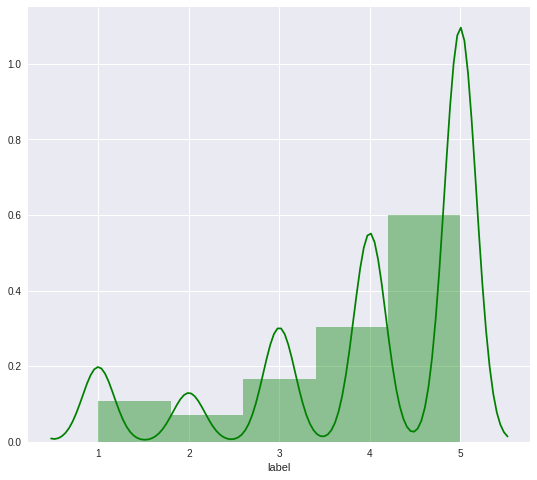

In [7]:
print(df['label'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['label'], color='g', bins=5, hist_kws={'alpha': 0.4});

Labels is strongly inbalanced: class '5' prevails over others.  
distribution over classes looks like left part of normal distribution with mean on '5'.  

# Correlation analisys

In [15]:
# calculate correlation matrix and get 'label' correlation column
df_num_corr = df.corr()['label'][:-1]
# get absolute value of correlation
abs_corr = abs(df_num_corr)
# sort and get top 20
abs_corr.sort_values(ascending=False).head(20)

f7_avg__r1     0.226838
f7_avg__r0     0.226745
f11_avg__r0    0.225283
f11_avg__r1    0.225230
f7_q2__r0      0.224088
f7_q3__r0      0.223948
f7_q2__r1      0.223854
f7_q3__r1      0.223776
f7_q4__r0      0.223102
f7_q4__r1      0.222957
f7_min__r3     0.221392
f7_q1__r3      0.221008
f7_q5__r1      0.220252
f7_q1__r0      0.220136
f7_max__r2     0.220128
f7_q2__r3      0.220018
f7_q5__r0      0.219952
f7_avg__r3     0.219930
f7_q4__r3      0.219743
f7_q5__r3      0.219632
Name: label, dtype: float64

0.22 is not very strong correlation and most of top correlated features is f7_XXX  
Possible it means that we have f7 feature that correlated with label and all f7 derivatives dont add something to classification model.  
What about not correlated features?

In [16]:
no_corr_list = abs_corr[abs_corr.isna()].index.values.tolist()
no_corr_list

['f8_min__r0',
 'f10_min__r0',
 'f18_min__r0',
 'f10_q1__r0',
 'f10_q2__r0',
 'f10_q3__r0',
 'f10_q4__r0',
 'f10_q5__r0',
 'f10_q6__r0',
 'f18_q1__r0',
 'f18_q2__r0',
 'f18_q3__r0',
 'f18_q4__r0',
 'f18_q5__r0',
 'f18_q6__r0',
 'f18_q7__r0',
 'f18_q8__r0',
 'f18_q9__r0',
 'f18_min__r1',
 'f8_min__r2',
 'f10_avg__r2',
 'f10_stddev__r2',
 'f10_min__r2',
 'f10_max__r2',
 'f18_avg__r2',
 'f18_stddev__r2',
 'f18_min__r2',
 'f18_max__r2',
 'f10_q1__r2',
 'f10_q2__r2',
 'f10_q3__r2',
 'f10_q4__r2',
 'f10_q5__r2',
 'f10_q6__r2',
 'f10_q7__r2',
 'f10_q8__r2',
 'f10_q9__r2',
 'f18_q1__r2',
 'f18_q2__r2',
 'f18_q3__r2',
 'f18_q4__r2',
 'f18_q5__r2',
 'f18_q6__r2',
 'f18_q7__r2',
 'f18_q8__r2',
 'f18_q9__r2',
 'f10_avg__r3',
 'f10_stddev__r3',
 'f10_min__r3',
 'f10_max__r3',
 'f18_avg__r3',
 'f18_stddev__r3',
 'f18_min__r3',
 'f18_max__r3',
 'f10_q1__r3',
 'f10_q2__r3',
 'f10_q3__r3',
 'f10_q4__r3',
 'f10_q5__r3',
 'f10_q6__r3',
 'f10_q7__r3',
 'f10_q8__r3',
 'f10_q9__r3',
 'f18_q1__r3',
 'f18_q2_

It looks that f18 and f10 with derivatives not correlated with label

# Build Estimators

## Quality
'f1' metric stated as target metric for this work.  
There are 2 questions regarding this metric:
1. What kind of f1 metric must be chosen for multiclass classification
1. What is 'good' and what is 'bad' for given f1 value

Scikit learn provide several types of f1 metric. 2 types are good candidates to use: 'macro' and 'weighted'.  
Macro metric decription from documentation: "Calculate metrics globally by counting the total true positives, false negatives and false positives.". So macro is 'objective' metric that provide information how good is estimator for any given class - no metter of how often this class in dataset.  
Weighted metric: "Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.". This metric give more full representation - taking in account number of right answers.  
What metric is better? For the first look weighted is good candidate but for inbalance set (our case) it can produce wrong estimation. For example if we have strongly inbalance set then estimator that always returns this class will be good for weighted metric but in reality possibly it would not be the best case.  
So we will use both f1 metrics: macro and weighted.  
Second question need detailed exploration. There is no formal values for good and bad for f1.  
May be good candidate for bad value is results of Dummy estimator.  


Lets make train and test dataset

In [0]:
# crete X and y
X = df.iloc[:,1:-1].copy()
y = df['label']

# divide to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3623467829)


In [20]:
from sklearn.dummy import DummyClassifier

# calculate ground flow for stratified dummy classifier
clf = DummyClassifier(strategy='stratified',random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("F1 dummy strified weighted score %f" % f1_score(y_test, y_pred, average='weighted'))
print("F1 dummy strified macro score %f" % f1_score(y_test, y_pred, average='macro'))

# calculate ground flow for most_frequent dummy classifier
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("F1 dummy most_frequent weighted score %f" % f1_score(y_test, y_pred, average='weighted'))
print("F1 dummy most_frequent macro score %f" % f1_score(y_test, y_pred, average='macro'))



F1 dummy strified weighted score 0.323443
F1 dummy strified macro score 0.212425
F1 dummy most_frequent weighted score 0.306634
F1 dummy most_frequent macro score 0.128933


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best 'bad' macro score is 0.21 - for stratified dummy estimator.  
Best 'bad' weighted score is 0.32 - also for stratifed estimator.

## Traditional estimator

In [0]:
# import requried modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [0]:
import os
os.environ['JOBLIB_TEMP_FOLDER']='/tmp'

In [0]:
# balance training set by oversampling
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

# create emty params to fill later
params = {}

# PCA
pca = PCA(svd_solver='randomized', whiten=True)
params['pca__n_components'] = (300, 512, 800)

# SVM
svm = SVC(kernel='rbf')
params['svm__C'] = (0.8, 1, 5)
params['svm__gamma'] = [0.005, 0.01, 0.05]

# define pipeline
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm),
])

grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

print("Start fitting...")
t0 = time()
grid_search.fit(X_resampled, y_resampled)
print("done in %0.3fs" % (time() - t0))

[(1, 12181), (2, 12181), (3, 12181), (4, 12181), (5, 12181)]
Start fitting...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [0]:
# print best estimator params
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
# resultd evalution
y_pred = grid_search.best_estimator_.predict(X_test)
print("F1 dummy most_frequent weighted score %f" % f1_score(y_test, y_pred, average='weighted'))
print("F1 dummy most_frequent macro score %f" % f1_score(y_test, y_pred, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix,[1,2,3,4,5])

## Artificial Neural Networks estimator

In ANN estimator keros framework have been used.  
CNN shows good results in DNN for image classications, LSTM good for timeseries ans queued events (like words in sentense) but in our case we have just array of features with uknown nature.  
So chosen architecture is relatively shallow set of fully connected leyers interlaysed by dropout layers.  
there are several parameters to play with: number of layers, size of layers, dropout value.  
Bellow is result of our several tries to make effective architecture.

In [91]:
# crete X and y
X = df.iloc[:,1:-1].copy()
y = keras.utils.to_categorical(df['label'] - 1, num_classes=5)

# divide to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3623467829)
# preprocess features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
pca = PCA(n_components=512)
pca.fit(X_train)
X_train = pca.transform(X_train)

# balance train set
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_sample(X_train, np.argmax(y_train, 1))
X_train = X_resampled
y_train = keras.utils.to_categorical(y_resampled, num_classes=5)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(0, 12181), (1, 12181), (2, 12181), (3, 12181), (4, 12181)]


In [92]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=512))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=150,
          batch_size=128)



Epoch 1/50
60905/60905 [==============================] - 35s 580us/step - loss: 1.5209 - acc: 0.3139
Epoch 2/50
60905/60905 [==============================] - 34s 552us/step - loss: 1.4612 - acc: 0.3547
Epoch 3/50
60905/60905 [==============================] - 33s 544us/step - loss: 1.4025 - acc: 0.3954
Epoch 4/50
60905/60905 [==============================] - 33s 543us/step - loss: 1.3349 - acc: 0.4301
Epoch 5/50
60905/60905 [==============================] - 34s 551us/step - loss: 1.2641 - acc: 0.4675
Epoch 6/50
60905/60905 [==============================] - 34s 551us/step - loss: 1.1981 - acc: 0.4983
Epoch 7/50
60905/60905 [==============================] - 34s 553us/step - loss: 1.1363 - acc: 0.5242
Epoch 8/50
60905/60905 [==============================] - 33s 549us/step - loss: 1.0750 - acc: 0.5524
Epoch 9/50
60905/60905 [==============================] - 33s 548us/step - loss: 1.0272 - acc: 0.5730
Epoch 10/50
60905/60905 [==============================] - 34s 560us/step - loss: 

In [95]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=128)

Epoch 1/100
60905/60905 [==============================] - 35s 570us/step - loss: 0.2641 - acc: 0.8987
Epoch 2/100
60905/60905 [==============================] - 35s 571us/step - loss: 0.2556 - acc: 0.9034
Epoch 3/100
60905/60905 [==============================] - 34s 564us/step - loss: 0.2497 - acc: 0.9054
Epoch 4/100
60905/60905 [==============================] - 34s 561us/step - loss: 0.2494 - acc: 0.9068
Epoch 5/100
60905/60905 [==============================] - 34s 565us/step - loss: 0.2406 - acc: 0.9078
Epoch 6/100
60905/60905 [==============================] - 34s 561us/step - loss: 0.2379 - acc: 0.9091
Epoch 7/100
60905/60905 [==============================] - 34s 559us/step - loss: 0.2274 - acc: 0.9142
Epoch 8/100
60905/60905 [==============================] - 34s 556us/step - loss: 0.2253 - acc: 0.9142
Epoch 9/100
60905/60905 [==============================] - 34s 552us/step - loss: 0.2248 - acc: 0.9147
Epoch 10/100
60905/60905 [==============================] - 34s 563us/ste

In [96]:
# make prediction on test set
X_test_2 = pca.transform(scaler.transform(X_test))
# X_test_2 = scaler.transform(X_test)

y_pred = model.predict(X_test_2)
# calculate f1 weighted score
score = model.evaluate(X_test_2, y_test, batch_size=128)
print("Score = %f" % score[1])
print("F1 weighted score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='weighted'))
print("F1 macro score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='macro'))

2813/2813 [==============================] - 0s 148us/step
Score = 0.367579
F1 weighted score 0.372251
F1 macro score 0.271038


Confusion matrix, without normalization
[[ 69  35  34  37  80]
 [ 27  18  35  26  45]
 [ 34  25  64 100 148]
 [ 51  34  89 208 316]
 [ 85  70 177 331 675]]


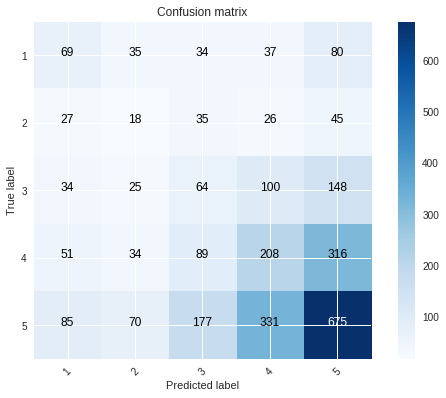

In [97]:
cnf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(y_pred, 1))
plot_confusion_matrix(cnf_matrix,[1,2,3,4,5])

Stacking binary classifiers with shallow multiclass classifier
===============================================

In [46]:
models = []
train_data = np.empty_like(y_train)
for i in range(0,5):  
  bmodel = Sequential()
  bmodel.add(Dense(512, activation='relu', input_dim=512))
  bmodel.add(Dropout(0.2))
  bmodel.add(Dense(1024, activation='relu'))
  bmodel.add(Dropout(0.2))
  bmodel.add(Dense(1024, activation='relu'))
  bmodel.add(Dropout(0.2))
  bmodel.add(Dense(512, activation='relu'))
  bmodel.add(Dropout(0.2))
  bmodel.add(Dense(1, activation='sigmoid'))
  sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  bmodel.compile(loss='binary_crossentropy',
                optimizer=sgd,
                metrics=['accuracy'])
  bmodel.fit(X_train, (np.argmax(y_train, 1)==i)+0,
            epochs=50,
            batch_size=128)
  models.append(bmodel)
  r = bmodel.predict(X_train)
  train_data[:,i] = r.reshape(1, len(r))



Epoch 1/50
25312/25312 [==============================] - 15s 573us/step - loss: 0.2935 - acc: 0.9119
Epoch 2/50
25312/25312 [==============================] - 14s 546us/step - loss: 0.2655 - acc: 0.9139
Epoch 3/50
25312/25312 [==============================] - 13s 533us/step - loss: 0.2613 - acc: 0.9138
Epoch 4/50
25312/25312 [==============================] - 15s 591us/step - loss: 0.2561 - acc: 0.9144
Epoch 5/50
25312/25312 [==============================] - 14s 551us/step - loss: 0.2533 - acc: 0.9143
Epoch 6/50
25312/25312 [==============================] - 14s 541us/step - loss: 0.2508 - acc: 0.9154
Epoch 7/50
25312/25312 [==============================] - 13s 532us/step - loss: 0.2468 - acc: 0.9155
Epoch 8/50
25312/25312 [==============================] - 14s 541us/step - loss: 0.2468 - acc: 0.9148
Epoch 9/50
25312/25312 [==============================] - 13s 532us/step - loss: 0.2432 - acc: 0.9162
Epoch 10/50
25312/25312 [==============================] - 13s 529us/step - loss: 

In [87]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
X_resampled, y_resampled = SMOTEENN(random_state=0).fit_sample(train_data, np.argmax(y_train, 1))

mmodel = Sequential()
mmodel.add(Dense(5, activation='relu', input_dim=5))
mmodel.add(Dropout(0.2))
mmodel.add(Dense(100, activation='relu'))
mmodel.add(Dropout(0.2))
mmodel.add(Dense(100, activation='relu'))
mmodel.add(Dropout(0.2))
mmodel.add(Dense(10, activation='relu'))
mmodel.add(Dropout(0.2))
mmodel.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
mmodel.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
mmodel.fit(X_resampled, keras.utils.to_categorical(y_resampled, num_classes=5),
          epochs=50,
          batch_size=128)
  




Epoch 1/50
50258/50258 [==============================] - 3s 63us/step - loss: 1.1510 - acc: 0.5206
Epoch 2/50
50258/50258 [==============================] - 2s 31us/step - loss: 0.6929 - acc: 0.7512
Epoch 3/50
50258/50258 [==============================] - 2s 31us/step - loss: 0.6312 - acc: 0.7871
Epoch 4/50
50258/50258 [==============================] - 1s 28us/step - loss: 0.6062 - acc: 0.8018
Epoch 5/50
50258/50258 [==============================] - 1s 26us/step - loss: 0.5932 - acc: 0.8082
Epoch 6/50
50258/50258 [==============================] - 1s 26us/step - loss: 0.5871 - acc: 0.8133
Epoch 7/50
50258/50258 [==============================] - 1s 28us/step - loss: 0.5751 - acc: 0.8186
Epoch 8/50
50258/50258 [==============================] - 2s 31us/step - loss: 0.5718 - acc: 0.8188
Epoch 9/50
50258/50258 [==============================] - 2s 30us/step - loss: 0.5560 - acc: 0.8252
Epoch 10/50
50258/50258 [==============================] - 2s 31us/step - loss: 0.5575 - acc: 0.8260

In [0]:
# make prediction on test set
X_test_2 = pca.transform(scaler.transform(X_test))

test_data = np.empty_like(y_test)
for i in range(0,5):  
  r = models[i].predict(X_test_2)
  test_data[:,i] = r.reshape(1, len(r))

y_pred = mmodel.predict(test_data)

F1 weighted score 0.285572
F1 macro score 0.248999
Confusion matrix, without normalization
[[ 91  30  54  52  28]
 [ 32  14  48  40  17]
 [ 35  26 127 131  52]
 [ 79  36 176 298 109]
 [130  42 344 554 268]]


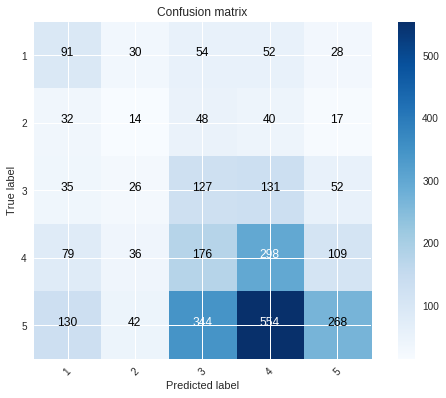

In [89]:
print("F1 weighted score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='weighted'))
print("F1 macro score %f" % f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='macro'))
cnf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(y_pred, 1))
plot_confusion_matrix(cnf_matrix,[1,2,3,4,5])

# Conclusion

# Future work
Presumably neural network approach can provide better results.  
Key development directions:  
1. Try deep architectures with [regularizers](https://keras.io/regularizers/)
1. Make CNN with convolutions based on fX-groups of features. Convolutions in image classification extruct base features from 2d-local regions, so hypoteses is to extruct base features of provided data from fX groups of features (that presumably gouped in some space)
1. Fit autoencoders on fX groups of features and use them as input layer for 2-3 fully connected layers

In [74]:
# Conclusion

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [70]:
test_data[:,4]

array([0.64628077, 0.1409099 , 0.24805814, ..., 0.7932067 , 0.23624058,
       0.49216738], dtype=float32)